In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import datetime
%matplotlib inline

1. Calculate some descriptive statistics for how many jobs per hour are being completed. What does the completions per hour look like over the time span of the dataset? Are there weekly trends, and has it been increasing over the last year?

In [2]:
#read in the csv
jobs = pd.read_csv('../accre-candy-corn/accre-scheduler-data-2021/fullsample.csv')
#convert BEGIN date column to dtype datetime64[ns]
jobs['BEGIN'] = pd.to_datetime(jobs['BEGIN'], errors='coerce', infer_datetime_format = True)
#convert END date column to dtype datetime64[ns]
jobs['END'] = pd.to_datetime(jobs['END'], errors='coerce', infer_datetime_format = True)

In [4]:
jobs['JOBLENGTH'] = jobs['END'] - jobs['BEGIN']

In [5]:
#jobs['REQMEMTOT'] = (required memory(per node or core))*(nodes or cores)

In [6]:
#jobs['REQMEMPERCORE'] = REQMEMTOT/CPUS

In [7]:
jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,JOBLENGTH
0,30616928,RUNNING,2021-07-31 22:15:00,NaT,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0,NaT
1,30853133,COMPLETED,2021-08-06 11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0,30 days 00:00:23
2,30858137,COMPLETED,2021-08-06 19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0,30 days 00:00:14
3,30935078,COMPLETED,2021-08-09 16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0,29 days 04:00:04
4,31364111_2,COMPLETED,2021-08-17 07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0,24 days 09:00:17


In [8]:
jobs['reqmem_all_nodes'] = jobs['REQMEM'].str.extract('(\d+)Mn')
jobs['reqmem_all_nodes'] = pd.to_numeric(jobs['reqmem_all_nodes'], errors = 'coerce')
jobs['reqmem_all_nodes'] = jobs['reqmem_all_nodes'] * jobs['NODES']
jobs[jobs['NODES'] == 2]
jobs['reqmem_all_CPUS'] = jobs['REQMEM'].str.extract('(\d+)Mc')
jobs['reqmem_all_CPUS'] = pd.to_numeric(jobs['reqmem_all_CPUS'], errors = 'coerce')
jobs['reqmem_all_CPUS'] = jobs['reqmem_all_CPUS'] * jobs['CPUS']

In [9]:
jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,JOBLENGTH,reqmem_all_nodes,reqmem_all_CPUS
0,30616928,RUNNING,2021-07-31 22:15:00,NaT,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0,NaT,2048.0,NaN
1,30853133,COMPLETED,2021-08-06 11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0,30 days 00:00:23,262144.0,NaN
2,30858137,COMPLETED,2021-08-06 19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0,30 days 00:00:14,204800.0,NaN
3,30935078,COMPLETED,2021-08-09 16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0,29 days 04:00:04,65536.0,NaN
4,31364111_2,COMPLETED,2021-08-17 07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0,24 days 09:00:17,16384.0,NaN


In [10]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395885 entries, 0 to 7395884
Data columns (total 15 columns):
 #   Column            Dtype          
---  ------            -----          
 0   JOBID             object         
 1   STATE             object         
 2   BEGIN             datetime64[ns] 
 3   END               datetime64[ns] 
 4   REQMEM            object         
 5   USEDMEM           object         
 6   REQTIME           object         
 7   USEDTIME          object         
 8   NODES             int64          
 9   CPUS              int64          
 10  PARTITION         object         
 11  EXITCODE          object         
 12  JOBLENGTH         timedelta64[ns]
 13  reqmem_all_nodes  float64        
 14  reqmem_all_CPUS   float64        
dtypes: datetime64[ns](2), float64(2), int64(2), object(8), timedelta64[ns](1)
memory usage: 846.4+ MB


In [43]:
jobs[jobs['STATE'] == 'COMPLETED'].value_counts() #WHAT happened here?

Series([], dtype: int64)

In [12]:
completed_jobs = jobs[jobs['STATE']=='COMPLETED']

completed_jobs = completed_jobs.sort_values('BEGIN')

completed_jobs['ROLL1H'] = completed_jobs.rolling('1h', on = 'BEGIN')['JOBID'].count()

completed_jobs['ROLL1W'] = completed_jobs.rolling('7d', on = 'BEGIN')['JOBID'].count()

In [13]:
print(completed_jobs['BEGIN'].isna().sum())

print(jobs['BEGIN'].isna().sum())
#looks like when we subsetted on 'COMPLETED' and sorted on 'BEGIN', it took care of
#whatever, 'Unknown' value others were having trouble with. 

0
443


In [14]:
failed_jobs = jobs[jobs['STATE']=='FAILED']

failed_jobs = failed_jobs.sort_values('BEGIN')

failed_jobs['ROLL1H'] = failed_jobs.rolling('1h', on = 'BEGIN')['JOBID'].count()



In [15]:
failed_jobs['ROLL1W'] = failed_jobs.rolling('7d', on = 'BEGIN')['JOBID'].count()

In [16]:
failed_jobs

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,JOBLENGTH,reqmem_all_nodes,reqmem_all_CPUS,ROLL1H,ROLL1W
6658445,24482512,FAILED,2020-10-01 13:29:01,2020-10-01 14:12:01,2048Mn,6.11M,01:00:00,00:43:00,1,1,production,2:0,0 days 00:43:00,2048.0,NaN,1.0,1.0
6692782,24522764,FAILED,2020-10-02 11:05:38,2020-10-02 11:48:42,4096Mc,331.10M,1-00:00:00,00:43:04,1,8,production,2:0,0 days 00:43:04,NaN,32768.0,1.0,2.0
6696573,24527402,FAILED,2020-10-02 12:36:56,2020-10-03 08:37:06,122880Mn,55514.18M,20:00:00,20:00:10,1,1,pascal,1:0,0 days 20:00:10,122880.0,NaN,1.0,3.0
6700400,24531300,FAILED,2020-10-02 14:05:14,2020-10-02 14:05:27,8192Mn,108.60M,16:00:00,00:00:13,1,1,production,1:0,0 days 00:00:13,8192.0,NaN,1.0,4.0
6724708,24571394,FAILED,2020-10-04 02:18:53,2020-10-04 02:19:08,10240Mn,208.07M,00:15:00,00:00:15,1,16,debug,1:0,0 days 00:00:15,10240.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914969,32884218,FAILED,2021-10-01 10:34:21,2021-10-01 10:34:21,10000Mn,0,01:00:00,00:00:00,1,1,production,1:0,0 days 00:00:00,10000.0,NaN,1.0,28.0
915122,32884886,FAILED,2021-10-01 11:26:47,2021-10-01 11:53:37,25600Mn,2321.74M,7-00:00:00,00:26:50,1,4,production,1:0,0 days 00:26:50,25600.0,NaN,2.0,29.0
915747,32885708,FAILED,2021-10-01 13:17:41,2021-10-01 13:17:42,10000Mn,0,01:00:00,00:00:01,1,1,production,1:0,0 days 00:00:01,10000.0,NaN,1.0,30.0
916585,32887102,FAILED,2021-10-01 14:18:46,2021-10-01 14:19:18,15000Mn,282.77M,09:00:00,00:00:32,1,1,production,1:0,0 days 00:00:32,15000.0,NaN,1.0,30.0


In [17]:
completed_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7375084 entries, 6640560 to 1491978
Data columns (total 17 columns):
 #   Column            Dtype          
---  ------            -----          
 0   JOBID             object         
 1   STATE             object         
 2   BEGIN             datetime64[ns] 
 3   END               datetime64[ns] 
 4   REQMEM            object         
 5   USEDMEM           object         
 6   REQTIME           object         
 7   USEDTIME          object         
 8   NODES             int64          
 9   CPUS              int64          
 10  PARTITION         object         
 11  EXITCODE          object         
 12  JOBLENGTH         timedelta64[ns]
 13  reqmem_all_nodes  float64        
 14  reqmem_all_CPUS   float64        
 15  ROLL1H            float64        
 16  ROLL1W            float64        
dtypes: datetime64[ns](2), float64(4), int64(2), object(8), timedelta64[ns](1)
memory usage: 1012.8+ MB


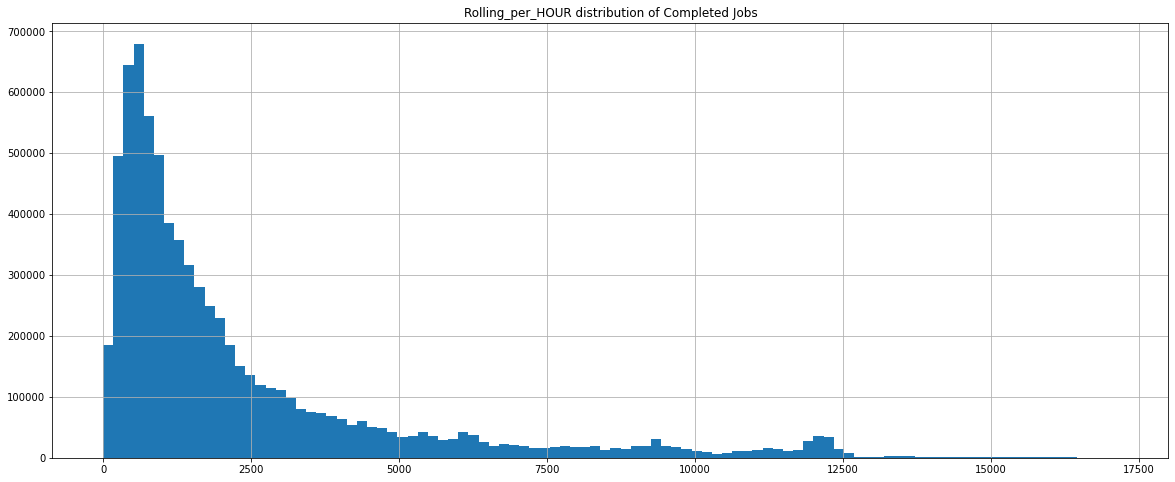

In [18]:
completed_jobs.hist('ROLL1H', bins = 100, figsize = (20,8))
plt.title('Rolling_per_HOUR distribution of Completed Jobs');

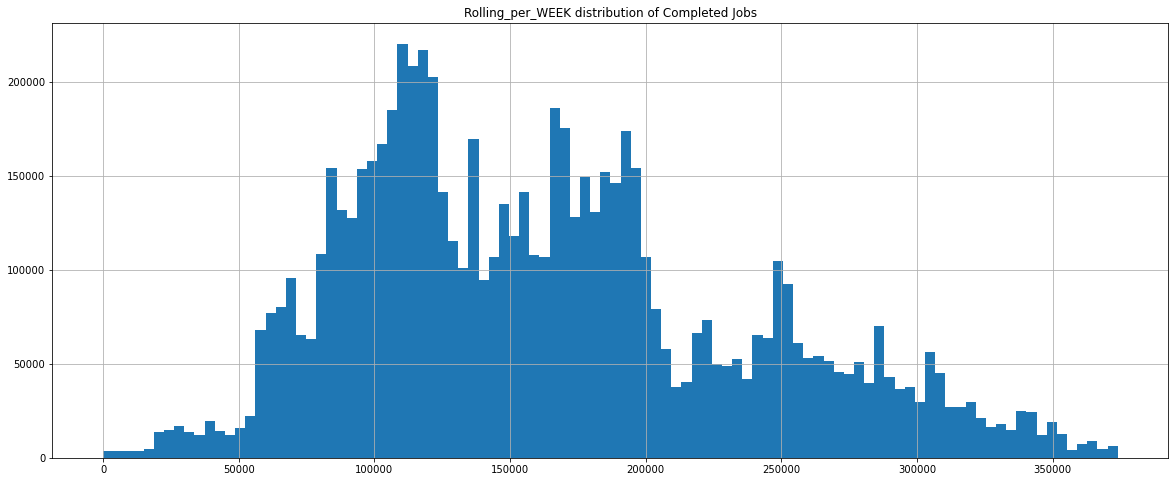

In [19]:
completed_jobs.hist('ROLL1W', bins = 100, figsize = (20,8))
plt.title('Rolling_per_WEEK distribution of Completed Jobs');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


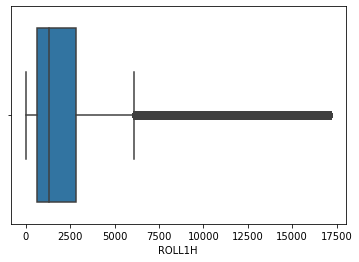

In [20]:
sns.boxplot(completed_jobs['ROLL1H']);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


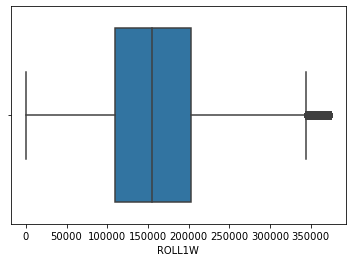

In [21]:
sns.boxplot(completed_jobs['ROLL1W']);

In [22]:
completed_jobs['ROLL1H'].describe()

count    7.375084e+06
mean     2.358120e+03
std      2.737708e+03
min      1.000000e+00
25%      6.430000e+02
50%      1.314000e+03
75%      2.826000e+03
max      1.714100e+04
Name: ROLL1H, dtype: float64

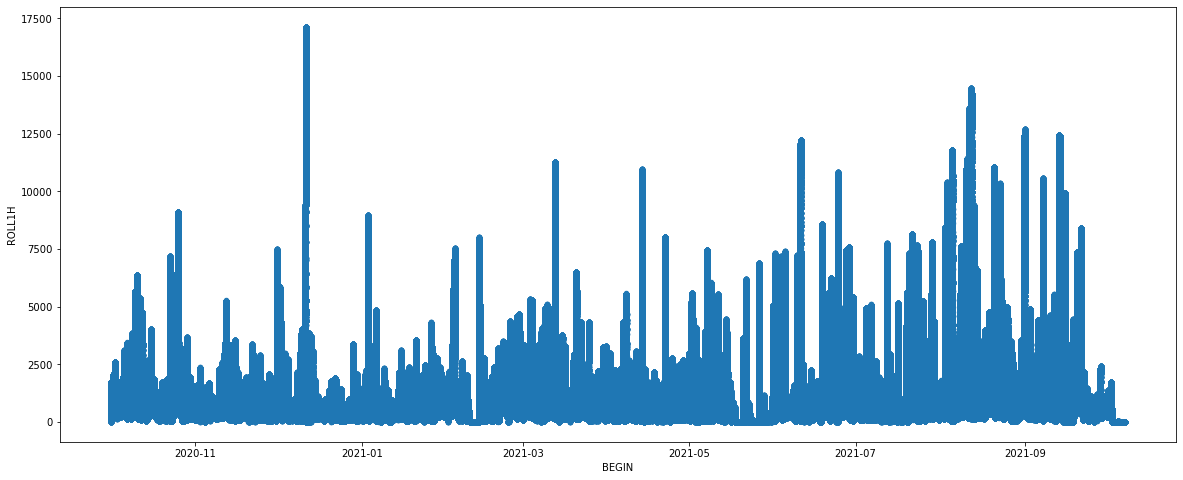

In [23]:
completed_jobs.plot(kind = 'scatter', x = 'BEGIN', y = 'ROLL1H', figsize = (20,8));



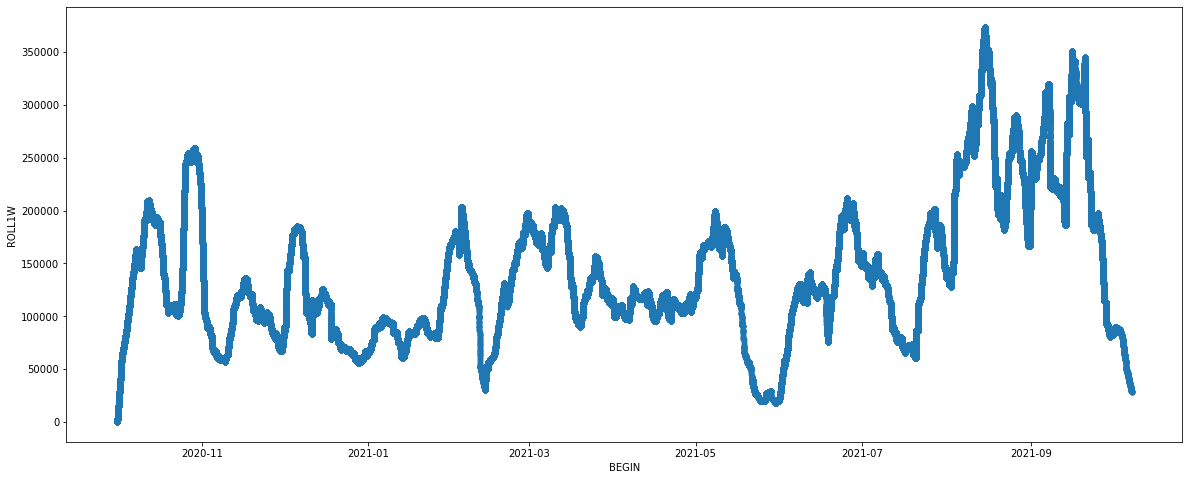

In [24]:
completed_jobs.plot(kind = 'scatter', x = 'BEGIN', y = 'ROLL1W', figsize = (20,8));

https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.dayofweek.html

Try to convert to day of the week and plot by day of the week to see if there's a drop off on a particular day of the week. the seaborn plot above took a long time and didn't not show up after waiting >5 minutes

### Analyze the Slurm data sets to create a csv of times intervals when the scheduler became unresponsive. Correlate to time intervals in this data set that correspond to large numbers of 'completions' from this data set

In [25]:
#Chris created this CSV from merging ce5 with ce6
logs = pd.read_csv('../accre-candy-corn/timeouts.csv')

In [26]:
logs.head()

,time,user,retry,elapsed_time,return_code,command,server,timeouts_per_hour,timeouts_per_week
0,2020-10-18 06:16:25.392946,9204,0,20.037672,1,sbatch,ce6,1.0,1.0
1,2020-10-18 06:38:44.172473,9204,0,20.038736,1,sbatch,ce6,2.0,2.0
2,2020-10-18 06:53:44.272915,9204,0,20.038464,1,sbatch,ce5,3.0,3.0
3,2020-10-18 06:54:04.322412,9204,1,20.048906,1,sbatch,ce5,4.0,4.0
4,2020-10-18 07:47:25.825172,9204,0,20.082628,1,sbatch,ce5,3.0,5.0


In [27]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3296 entries, 0 to 3295
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               3296 non-null   object 
 1   user               3296 non-null   int64  
 2   retry              3296 non-null   int64  
 3   elapsed_time       3296 non-null   float64
 4   return_code        3296 non-null   int64  
 5   command            3296 non-null   object 
 6   server             3296 non-null   object 
 7   timeouts_per_hour  3296 non-null   float64
 8   timeouts_per_week  3296 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 231.9+ KB


In [28]:
logs['time'] = pd.to_datetime(logs['time'], errors='coerce', infer_datetime_format = True)

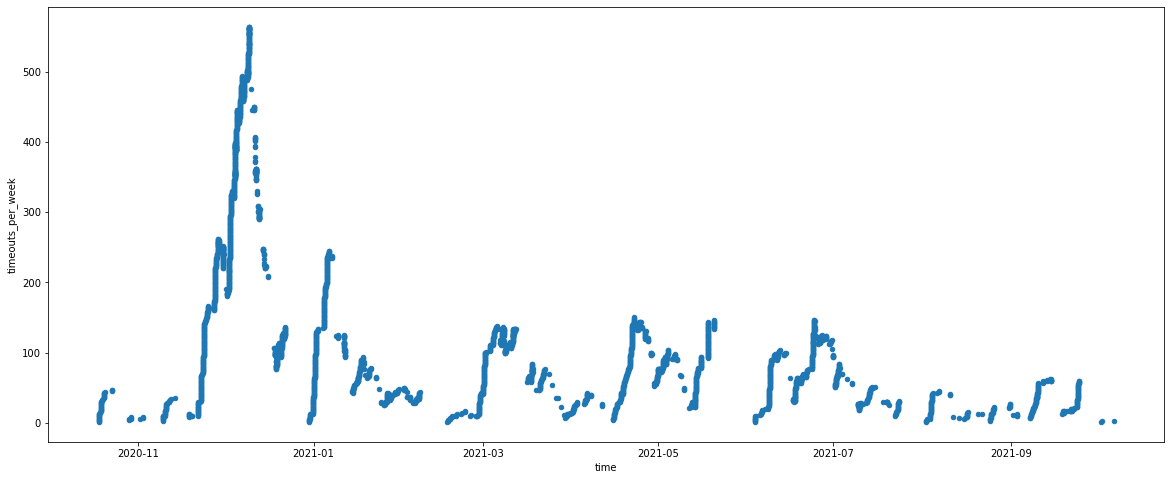

In [29]:
logs.plot(kind = 'scatter', x = 'time', y = 'timeouts_per_week', figsize = (20,8));

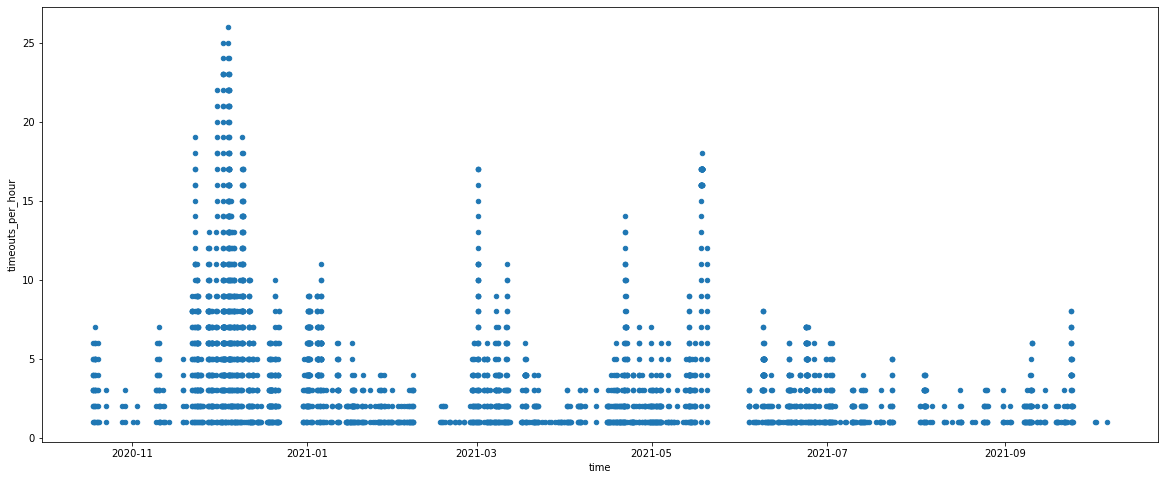

In [30]:
logs.plot(kind = 'scatter', x = 'time', y = 'timeouts_per_hour', figsize = (20,8));

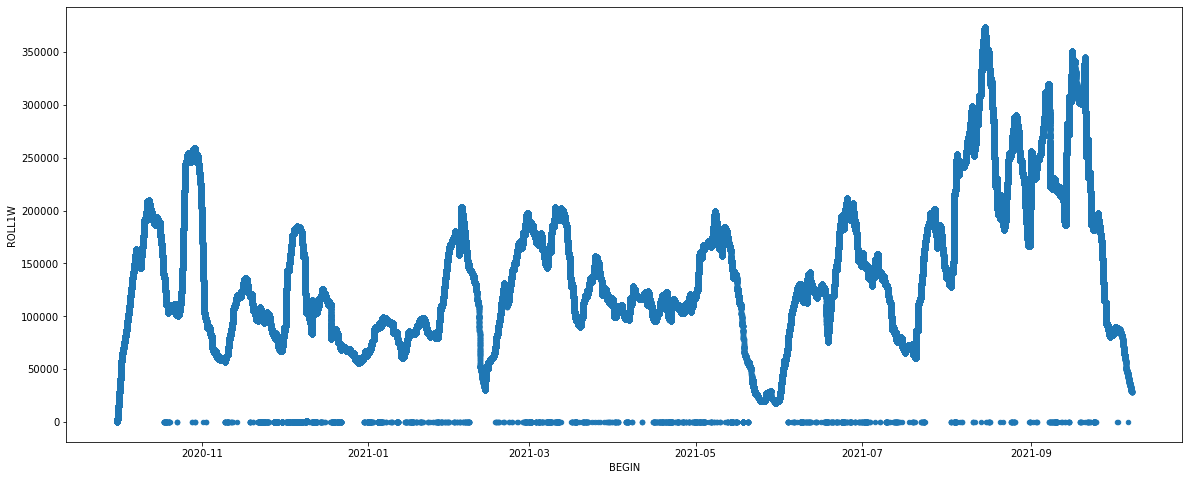

In [31]:
ax = logs.plot(kind = 'scatter', x = 'time', y = 'timeouts_per_week',figsize = (20,8))
completed_jobs.plot(kind = 'scatter', x = 'BEGIN', y = 'ROLL1W', ax = ax);

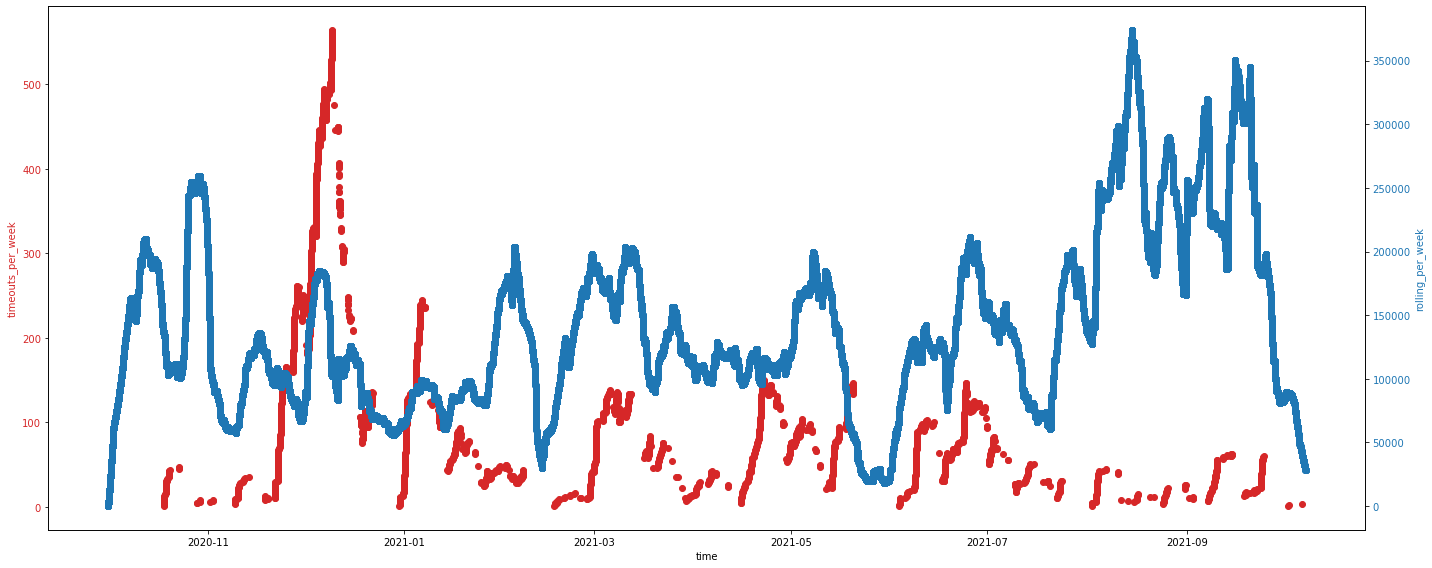

In [32]:
#https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/two_scales.html
fig, ax1 = plt.subplots(figsize = (20,8))

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('timeouts_per_week', color=color)
ax1.scatter(logs['time'], logs['timeouts_per_week'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rolling_per_week', color=color)  # we already handled the x-label with ax1
ax2.scatter(completed_jobs['BEGIN'], completed_jobs['ROLL1W'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()# otherwise the right y-label is slightly clipped
plt.show()

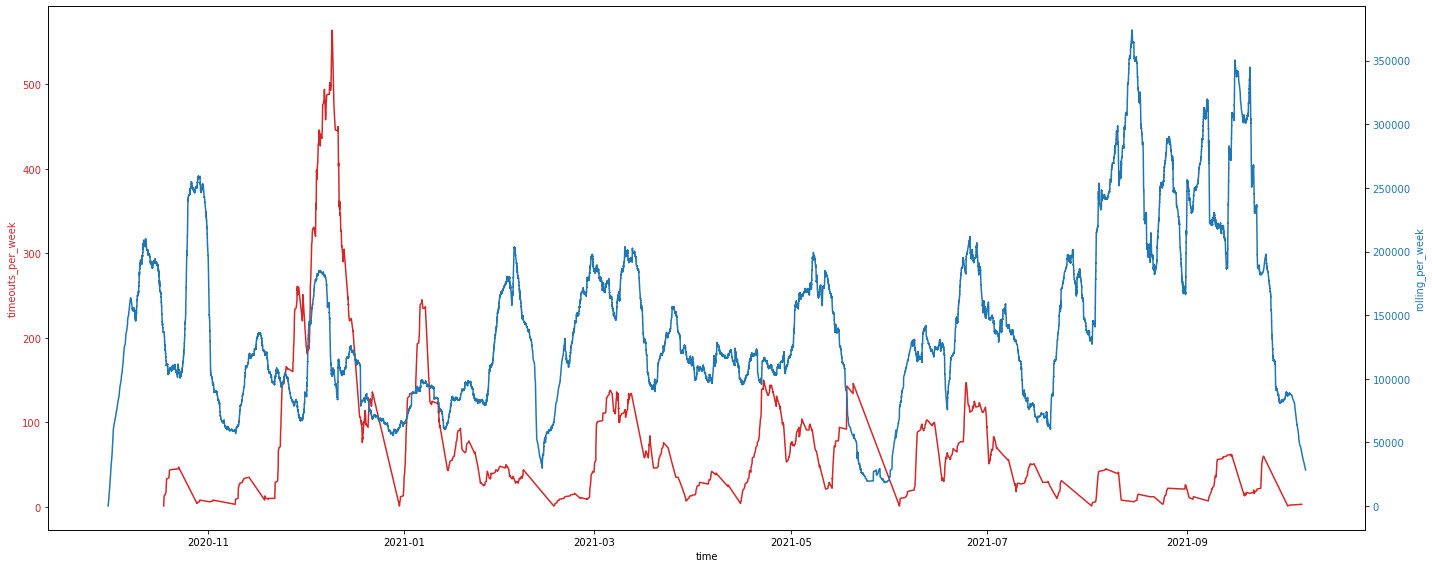

In [33]:
#https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/two_scales.html
fig, ax1 = plt.subplots(figsize = (20,8))

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('timeouts_per_week', color=color)
ax1.plot(logs['time'], logs['timeouts_per_week'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rolling_per_week', color=color)  # we already handled the x-label with ax1
ax2.plot(completed_jobs['BEGIN'], completed_jobs['ROLL1W'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()# otherwise the right y-label is slightly clipped
plt.show()

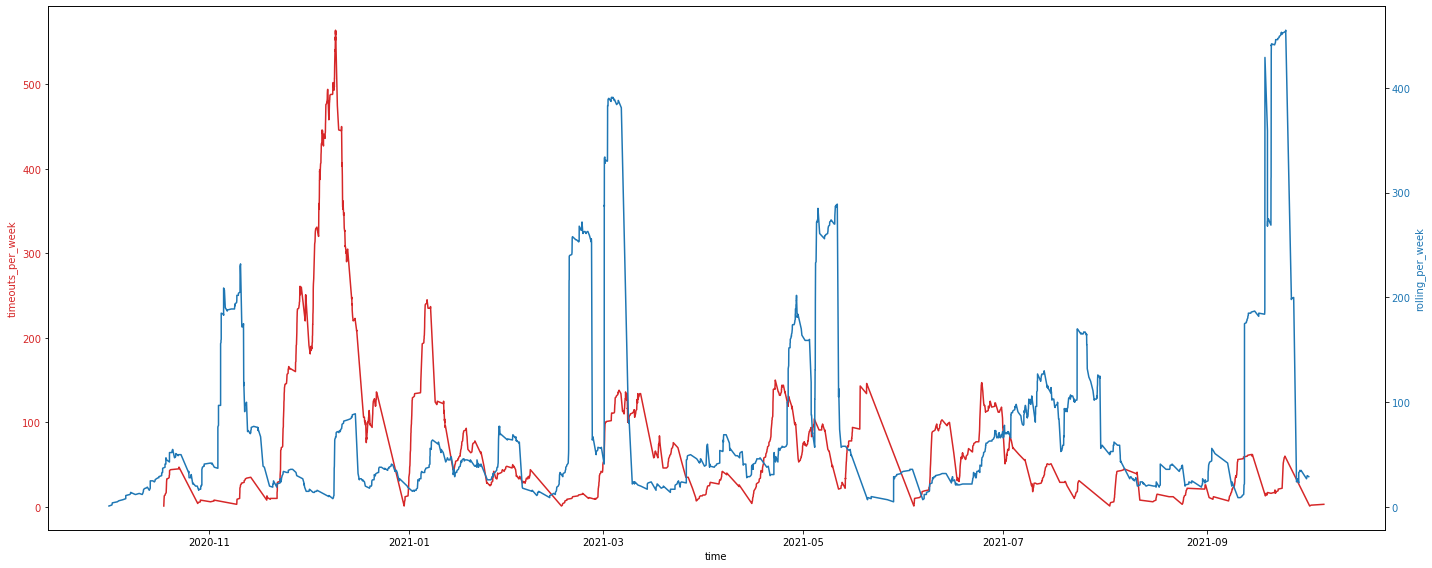

In [34]:
#https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/two_scales.html
fig, ax1 = plt.subplots(figsize = (20,8))

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('timeouts_per_week', color=color)
ax1.plot(logs['time'], logs['timeouts_per_week'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rolling_per_week', color=color)  # we already handled the x-label with ax1
ax2.plot(failed_jobs['BEGIN'], failed_jobs['ROLL1W'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()# otherwise the right y-label is slightly clipped
plt.show()

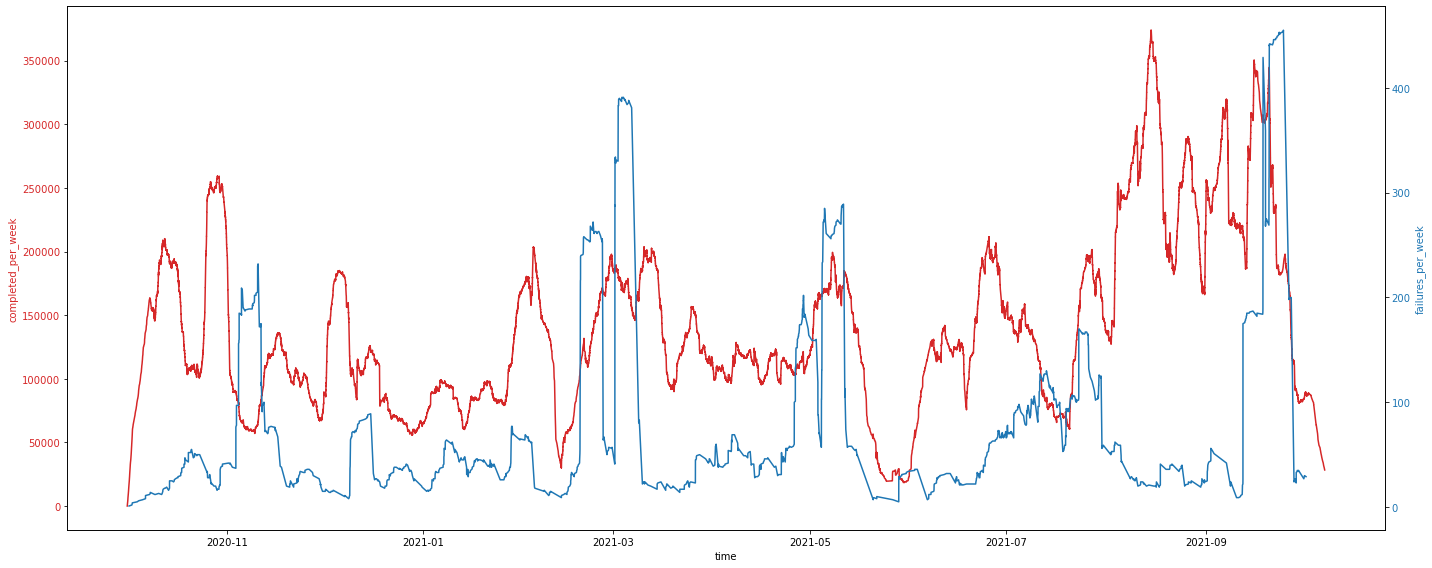

In [35]:
#https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/two_scales.html
fig, ax1 = plt.subplots(figsize = (20,8))

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('completed_per_week', color=color)
ax1.plot(completed_jobs['BEGIN'], completed_jobs['ROLL1W'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('failures_per_week', color=color)  # we already handled the x-label with ax1
ax2.plot(failed_jobs['BEGIN'], failed_jobs['ROLL1W'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()# otherwise the right y-label is slightly clipped
plt.show()

In [36]:
completed_jobs['Day'] = completed_jobs['BEGIN'].dt.day_name()

completed_jobs['Day'].value_counts()

Tuesday      1296280
Wednesday    1173674
Monday       1129373
Friday       1030839
Thursday     1024911
Sunday        872516
Saturday      847491
Name: Day, dtype: int64

In [37]:
logs['Day'] = logs['time'].dt.day_name()

logs['Day'].value_counts()

Friday       677
Wednesday    550
Monday       548
Saturday     408
Thursday     405
Tuesday      391
Sunday       317
Name: Day, dtype: int64

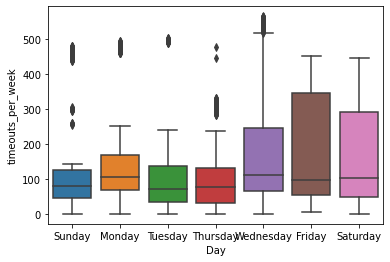

In [38]:
sns.boxplot(data=logs, x = 'Day', y ='timeouts_per_week', orient = 'v' );

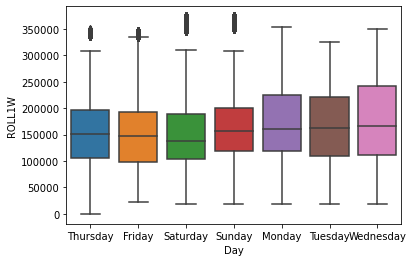

In [39]:
sns.boxplot(data=completed_jobs, x = 'Day', y ='ROLL1W', orient = 'v' );

In [40]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3296 entries, 0 to 3295
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time               3296 non-null   datetime64[ns]
 1   user               3296 non-null   int64         
 2   retry              3296 non-null   int64         
 3   elapsed_time       3296 non-null   float64       
 4   return_code        3296 non-null   int64         
 5   command            3296 non-null   object        
 6   server             3296 non-null   object        
 7   timeouts_per_hour  3296 non-null   float64       
 8   timeouts_per_week  3296 non-null   float64       
 9   Day                3296 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 257.6+ KB


In [41]:
#slice the data frame to a shorter overall time frame and 

In [42]:
#slurm_ce5['user'] = slurm_ce5['user'].str.slice(start = 5)